In [65]:
import seaborn as sns
import pandas as pd

penguins = sns.load_dataset("penguins")
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [66]:
shape = penguins.shape
print("Shape of the dataset:", shape)

Shape of the dataset: (344, 7)


In [67]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
from xgboost import XGBClassifier
import pickle

In [68]:
x = penguins.drop(columns=["species"])
y = penguins["species"]


In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=100
)


Exploratory Data Analysis

Data Visualization

C:\Users\Ramya\AppData\Local\Temp\ipykernel_19316\1285442602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=penguins, x="species", palette="viridis")


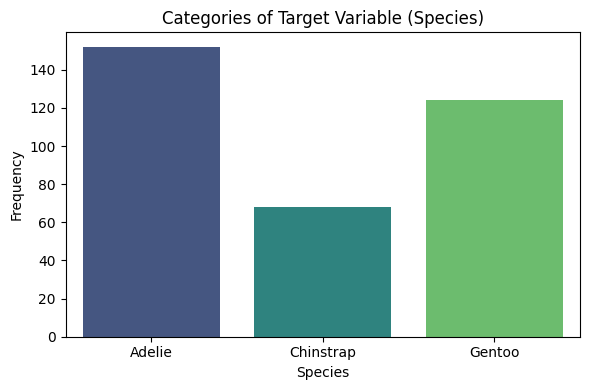

In [70]:
plt.figure(figsize=(6,4))
sns.countplot(data=penguins, x="species", palette="viridis")
plt.title("Categories of Target Variable (Species)")
plt.xlabel("Species")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

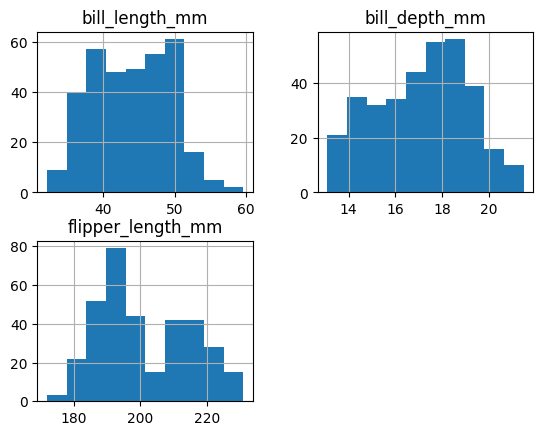

In [71]:
x[[ "bill_length_mm", "bill_depth_mm", "flipper_length_mm" ]].hist()
plt.show()


Histogram of 3 key features - bill length, bill depth, flipper length

Data Inspection

In [72]:
penguins.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [73]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [74]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [75]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [76]:
# handling missing values in numerical columns by imputing with median
numerical_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

for col in numerical_cols:
    median_value = penguins[col].median()
    penguins[col] = penguins[col].fillna(median_value)

In [77]:
#checking again for missing values
penguins.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [78]:
# handling missing values in categorical columns by imputing with mode

penguins["sex"] = penguins["sex"].fillna(penguins["sex"].mode()[0])
 

In [79]:
#checking again for missing values
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [80]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(penguins["species"])


In [81]:
x = penguins.drop(columns=["species"])
x = pd.get_dummies(x, drop_first=True) #avoids collinearity


To encode the categorical columns(species,island,sex): XGBoost classifier requires categorical encoding, and I applied one-hot encoding using pd.get_dummies(drop_first=True) for all input categorical variables.

In [82]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)


In [83]:
model = XGBClassifier(
    eval_metric="mlogloss"   # prevents warning
)

In [84]:
model.fit(x_train, y_train)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [85]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)


In [86]:
f1_train = f1_score(y_train, train_pred, average="macro")
f1_test  = f1_score(y_test,  test_pred,  average="macro")

print("Train F1-score:", f1_train)
print("Test F1-score:", f1_test)


Train F1-score: 1.0
Test F1-score: 1.0


In [87]:
target_names = [str(c) for c in label_encoder.classes_]

print("\nClassification Report (Train Set):")
print(classification_report(y_train, train_pred, target_names=target_names))


Classification Report (Train Set):
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       122
   Chinstrap       1.00      1.00      1.00        54
      Gentoo       1.00      1.00      1.00        99

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [88]:
target_names = [str(c) for c in label_encoder.classes_]

print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_pred, target_names=target_names))


Classification Report (Test Set):
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [89]:
# Convert numeric labels back to species names
y_train_labels = label_encoder.inverse_transform(y_train)
y_test_labels  = label_encoder.inverse_transform(y_test)


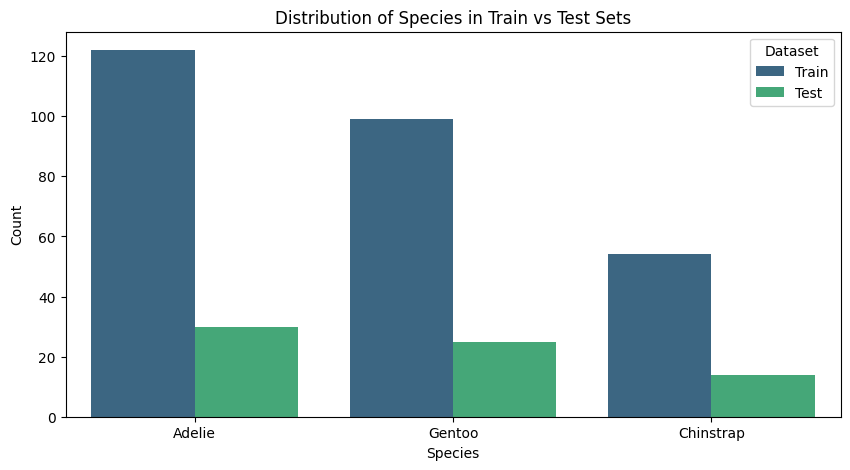

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a dataframe for easier plotting
df_train = pd.DataFrame({"species": y_train_labels, "dataset": "Train"})
df_test  = pd.DataFrame({"species": y_test_labels,  "dataset": "Test"})

df = pd.concat([df_train, df_test])

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="species", hue="dataset", palette="viridis")

plt.title("Distribution of Species in Train vs Test Sets")
plt.xlabel("Species")
plt.ylabel("Count")
plt.legend(title="Dataset")
plt.show()


C:\Users\Ramya\AppData\Local\Temp\ipykernel_19316\2288465733.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_labels, palette="Blues")
C:\Users\Ramya\AppData\Local\Temp\ipykernel_19316\2288465733.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test_labels, palette="Greens")


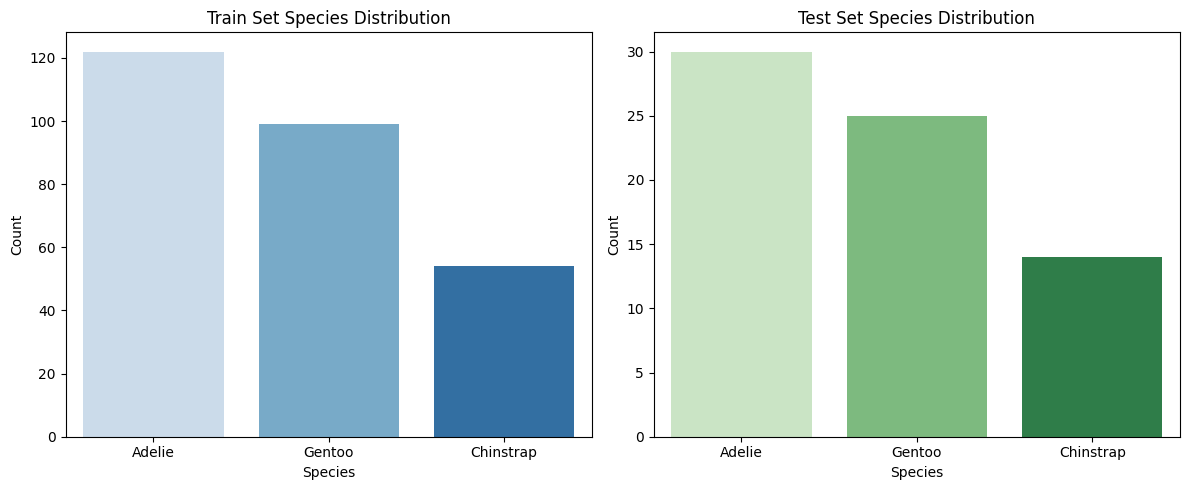

In [91]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x=y_train_labels, palette="Blues")
plt.title("Train Set Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.countplot(x=y_test_labels, palette="Greens")
plt.title("Test Set Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [92]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump({
        "model": model,
        "label_encoder": label_encoder,
        "columns": x.columns.tolist()
    }, f)


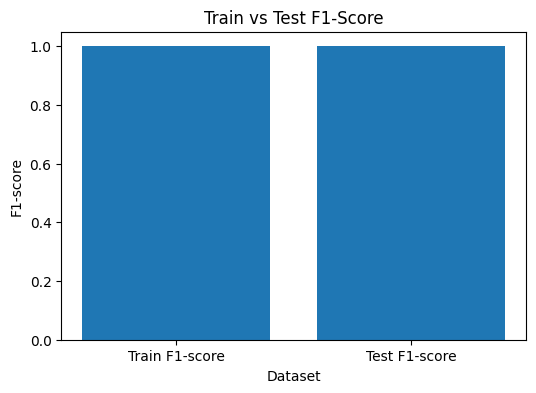

In [93]:
import matplotlib.pyplot as plt

# Your computed scores
scores = {
    "Train F1-score": f1_train,
    "Test F1-score": f1_test
}

plt.figure(figsize=(6,4))
plt.bar(scores.keys(), scores.values())
plt.ylim(0, 1.05)

plt.title("Train vs Test F1-Score")
plt.ylabel("F1-score")
plt.xlabel("Dataset")

plt.show()